# Topic Modeling using Gensim's Latent Dirichlet Allocation

In [1]:
# Importing the relevant python packages and reading the dataset

import pandas as pd
import numpy as np
import re
import nltk
import gensim

df = pd.read_csv("../Data/cleaned_comments.csv")
df

,Comment
0,so many questions by commenter unanswered i fo...
1,can i know how much in total for vaccinated tr...
2,why is there a per test in ilia airport it doe...
3,I am for vietnam and i want to flight into sin...
4,how long waiting after swab test
...,...
12436,Passed through Change the other day Was a weir...
12437,How was it
12438,Blu executor Just eerily empty Such a large bu...
12439,Cry to Insider I hope that sub par parody felt...


In [2]:
def corpus2docs(corpus):
    # corpus is a object returned by load_corpus that represents a corpus.
    doc = nltk.word_tokenize(corpus)
    docs2 = [w.lower() for w in doc]
    docs3 = [w for w in docs2 if re.search('^[a-z]+$', w)]
    docs4 = [w for w in docs3 if w not in stop_list]
    docs5 = [stemmer.stem(w) for w in docs4]
    return docs5

In [3]:
# Applying stopword removal and stemming on the corpus

stop_list = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.porter.PorterStemmer()

text_whole = []
text_whole.extend(df["Comment"])
cleaned_text = []

for comment in text_whole:
    clean = corpus2docs(comment)
    cleaned_text.append(clean)
    
print(cleaned_text)

[['mani', 'question', 'comment', 'unansw', 'one', 'want', 'know', 'foreign', 'enter', 'singapor', 'abl', 'use', 'vol'], ['know', 'much', 'total', 'vaccin', 'travel', 'lane', 'flight', 'includ', 'per', 'test', 'per', 'pax'], ['per', 'test', 'ilia', 'airport', 'make', 'sens', 'sinc', 'test', 'alreadi', 'conduct', 'spore', 'prior', 'travel', 'asian', 'gov', 'sure', 'know', 'make', 'difficult', 'travel', 'poor', 'malaysian', 'work', 'spore', 'pay', 'lot', 'money', 'wast', 'much', 'time', 'get', 'see', 'famili'], ['vietnam', 'want', 'flight', 'singapor', 'want', 'get', 'malaysia', 'land', 'possibl'], ['long', 'wait', 'swab', 'test'], ['possibl', 'sep', 'malaysia', 'resid', 'ism', 'intern', 'tourist', 'enter', 'malaysia', 'via', 'singapor', 'vol'], ['cost', 'summari'], ['book', 'per', 'test', 'ilia', 'arriv'], ['ye'], ['land', 'singapor', 'eth', 'jan', 'flight', 'koala', 'bumper', 'best', 'way', 'book', 'per', 'test'], ['book', 'got', 'link', 'book', 'two', 'day', 'malaysia', 'flight'], ['wo

In [4]:
# Create a dictionary representation of the documents. Each word gets an id

dictionary = gensim.corpora.Dictionary(cleaned_text)

print('Sample word to id mappings:\n', list(dictionary.items())[:50])
print('Total Vocabulary Size:', len(dictionary))

Sample word to id mappings:
 [(0, 'abl'), (1, 'comment'), (2, 'enter'), (3, 'foreign'), (4, 'know'), (5, 'mani'), (6, 'one'), (7, 'question'), (8, 'singapor'), (9, 'unansw'), (10, 'use'), (11, 'vol'), (12, 'want'), (13, 'flight'), (14, 'includ'), (15, 'lane'), (16, 'much'), (17, 'pax'), (18, 'per'), (19, 'test'), (20, 'total'), (21, 'travel'), (22, 'vaccin'), (23, 'airport'), (24, 'alreadi'), (25, 'asian'), (26, 'conduct'), (27, 'difficult'), (28, 'famili'), (29, 'get'), (30, 'gov'), (31, 'ilia'), (32, 'lot'), (33, 'make'), (34, 'malaysian'), (35, 'money'), (36, 'pay'), (37, 'poor'), (38, 'prior'), (39, 'see'), (40, 'sens'), (41, 'sinc'), (42, 'spore'), (43, 'sure'), (44, 'time'), (45, 'wast'), (46, 'work'), (47, 'land'), (48, 'malaysia'), (49, 'possibl')]
Total Vocabulary Size: 7641


In [5]:
# Transforming corpus into bag of words vectors

corpus_vect = [dictionary.doc2bow(text) for text in cleaned_text]

In [6]:
# Applying the LDA Model, generating a user defined number of 30 topics from the LDA

num_topics = 30
ldamodel = gensim.models.ldamodel.LdaModel(corpus_vect, num_topics = num_topics, id2word = dictionary, passes = 25, random_state= 0)

In [7]:
# Formatting the topics in print
for num ,topic in ldamodel.show_topics(formatted = True, num_topics = num_topics, num_words = 10):
    print(str(num)+": "+ topic)

0: 0.135*"good" + 0.035*"govern" + 0.030*"job" + 0.022*"bad" + 0.020*"man" + 0.020*"realli" + 0.019*"idea" + 0.017*"luck" + 0.017*"recoveri" + 0.016*"head"
1: 0.185*"peopl" + 0.054*"parti" + 0.032*"action" + 0.022*"read" + 0.020*"poor" + 0.019*"south" + 0.017*"side" + 0.016*"thought" + 0.016*"result" + 0.014*"nonsens"
2: 0.071*"covid" + 0.062*"viru" + 0.055*"live" + 0.042*"infect" + 0.039*"vaccin" + 0.035*"peopl" + 0.023*"get" + 0.022*"spread" + 0.022*"like" + 0.020*"rate"
3: 0.058*"everyon" + 0.041*"law" + 0.038*"bring" + 0.034*"ye" + 0.025*"problem" + 0.024*"matter" + 0.020*"like" + 0.020*"one" + 0.019*"least" + 0.018*"move"
4: 0.133*"state" + 0.118*"unit" + 0.043*"tax" + 0.038*"tell" + 0.029*"hospit" + 0.029*"gener" + 0.024*"enough" + 0.019*"leader" + 0.019*"get" + 0.018*"interest"
5: 0.087*"new" + 0.076*"variant" + 0.045*"pfizer" + 0.030*"delta" + 0.022*"brain" + 0.021*"like" + 0.020*"current" + 0.020*"sens" + 0.019*"media" + 0.019*"expect"
6: 0.066*"thank" + 0.053*"report" + 0.053

In [8]:
# Alternatively save the topic word distribution in a list
topics = ldamodel.show_topics(formatted = True, num_topics = 30, num_words = 10)
for topic in topics:
    print("Topic {}: {}".format(topic[0], topic[1]))
    print("\n")

Topic 0: 0.135*"good" + 0.035*"govern" + 0.030*"job" + 0.022*"bad" + 0.020*"man" + 0.020*"realli" + 0.019*"idea" + 0.017*"luck" + 0.017*"recoveri" + 0.016*"head"


Topic 1: 0.185*"peopl" + 0.054*"parti" + 0.032*"action" + 0.022*"read" + 0.020*"poor" + 0.019*"south" + 0.017*"side" + 0.016*"thought" + 0.016*"result" + 0.014*"nonsens"


Topic 2: 0.071*"covid" + 0.062*"viru" + 0.055*"live" + 0.042*"infect" + 0.039*"vaccin" + 0.035*"peopl" + 0.023*"get" + 0.022*"spread" + 0.022*"like" + 0.020*"rate"


Topic 3: 0.058*"everyon" + 0.041*"law" + 0.038*"bring" + 0.034*"ye" + 0.025*"problem" + 0.024*"matter" + 0.020*"like" + 0.020*"one" + 0.019*"least" + 0.018*"move"


Topic 4: 0.133*"state" + 0.118*"unit" + 0.043*"tax" + 0.038*"tell" + 0.029*"hospit" + 0.029*"gener" + 0.024*"enough" + 0.019*"leader" + 0.019*"get" + 0.018*"interest"


Topic 5: 0.087*"new" + 0.076*"variant" + 0.045*"pfizer" + 0.030*"delta" + 0.022*"brain" + 0.021*"like" + 0.020*"current" + 0.020*"sens" + 0.019*"media" + 0.019*"exp

## Output of topics from LDA in print

Topic 0: good, govern, job, bad, man, realli, idea, luck, recoveri, head  
Topic 1: peopl, parti, action, read, poor, south, side, thought, result, nonsens  
Topic 2: covid, viru, live, infect, vaccin, peopl, get, spread, like, rate  
Topic 3: everyon, law, bring, ye, problem, matter, like, one, least, move  
Topic 4: state, unit, tax, tell, hospit, gener, enough, leader, get, interest  
Topic 5: new, variant, pfizer, delta, brain, like, current, sens, media, expect  
Topic 6: thank, report, news, trial, lee, wish, decis, time, other, asia  
Topic 7: know, work, ask, question, understand, stupid, follow, research, pandem, mtg  
Topic 8: thing, put, life, risk, via, never, done, control, health, higher  
Topic 9: talk, la, lot, suffer, food, sinc, whole, alway, buy, first  
Topic 10: test, day, per, made, week, without, quarantin, fear, invest, profit  
Topic 11: case, number, cd, import, singaporean, less, restrict, mani, young, increas  
Topic 12: money, home, stay, safe, want, make, compar, data, via, full  
Topic 13: face, tear, joy, grin, mouth, red, think, sweat, cri, vomit  
Topic 14: singapor, countri, world, foreign, citizen, come, worker, govern, go, situat  
Topic 15: hand, thumb, clap, self, spike, mark, airport, agre, handl, eth  
Topic 16: countri, open, india, singapor, hope, wait, need, china, border, soon  
Topic 17: see, comment, well, best, one, said, eat, step, guy, love  
Topic 18: like, low, care, use, free, would, seem, go, school, look  
Topic 19: vaccin, travel, lane, covid, case, high, daili, countri, ada, singapor  
Topic 20: malaysia, trade, friend, invest, help, expert, thank, na, today, god  
Topic 21: one, two, thousand, hundr, year, twenti, three, five, day, point  
Topic 22: time, place, noth, garden, look, tourist, respons, blood, due, neg  
Topic 23: air, omicron, sure, also, pay, co, right, measur, expens, total  
Topic 24: go, get, back, come, better, pleas, time, english, everyth, singaporean  
Topic 25: way, fake, carri, allow, must, public, consid, kind, elderli, pass  
Topic 26: us, let, close, big, open, singapor, govt, far, million, old  
Topic 27: vaccin, person, booster, take, protect, shot, skin, jab, sign, tone  
Topic 28: face, eye, smile, heart, clown, welcom, beam, forc, minist, check  
Topic 29: roll, laugh, floor, mask, wear, tourism, youtube, mail, half, wuhan  

In [10]:
news_sentences = [comment for comment in text_whole]

In [11]:
# Function to format the topics and the words in the comments that contribute to the topics

def format_topics_sentences(ldamodel = ldamodel, corpus = corpus_vect, texts = news_sentences):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key = lambda x: (x[1]), reverse = True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index = True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [12]:
df_topic_sents_keywords = format_topics_sentences(ldamodel = ldamodel, corpus = corpus_vect, texts = news_sentences)

In [13]:
# Shows how each comment contribute to the respective topics derived

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,14.0,0.3338,"singapor, countri, world, foreign, citizen, co...",so many questions by commenter unanswered i fo...
1,1,10.0,0.3502,"test, day, per, made, week, without, quarantin...",can i know how much in total for vaccinated tr...
2,2,10.0,0.1472,"test, day, per, made, week, without, quarantin...",why is there a per test in ilia airport it doe...
3,3,16.0,0.4101,"countri, open, india, singapor, hope, wait, ne...",I am for vietnam and i want to flight into sin...
4,4,16.0,0.4067,"countri, open, india, singapor, hope, wait, ne...",how long waiting after swab test
5,5,20.0,0.2231,"malaysia, trade, friend, invest, help, expert,...",so this is only possible for sep and malaysia ...
6,6,10.0,0.3445,"test, day, per, made, week, without, quarantin...",his what about cost summary
7,7,10.0,0.6723,"test, day, per, made, week, without, quarantin...",do you have to book the per test at ilia befor...
8,8,3.0,0.5167,"everyon, law, bring, ye, problem, matter, like...",yes you should
9,9,16.0,0.2761,"countri, open, india, singapor, hope, wait, ne...",i will land in singapore eth jan am and flight...


In [14]:
# Evaluation of LDA Model using Coherence Score and Perplexity

from gensim.models import CoherenceModel

log_perplexity = ldamodel.log_perplexity(corpus_vect)
perplexity = 2 ** (-log_perplexity)
print('Perplexity: ',perplexity)

# Compute Coherence Score, measures homogeneity of assessing the quality of the output topics
coherence_model_lda = CoherenceModel(model = ldamodel, texts = cleaned_text, dictionary = dictionary, coherence = 'c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Perplexity:  1156.1216726478403

Coherence Score:  0.39980962840257256


In [15]:
# Determine the optimal number of topics to get highest coherence score, using 30 topics
# This may take some time to run

import datetime

print(datetime.datetime.now())

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 30, 2):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus_vect, num_topics = num_topics, id2word = dictionary, passes = 25, random_state= 0)
    model_topics.append(num_topics)
    model_list.append(ldamodel)
    coherence_model_lda = CoherenceModel(model = ldamodel, texts = cleaned_text, dictionary = dictionary, coherence = 'c_v')
    coherence_values.append(coherence_model_lda.get_coherence())
    print("#Topics: " + str(num_topics) + ", Score: " + str(coherence_model_lda.get_coherence()))

print(datetime.datetime.now())

2022-04-07 14:43:47.849089
#Topics: 2, Score: 0.3537624558552398
#Topics: 4, Score: 0.41106376332825256
#Topics: 6, Score: 0.44188668049581353
#Topics: 8, Score: 0.38938978003285796
#Topics: 10, Score: 0.41196652762004804
#Topics: 12, Score: 0.4243940403859417
#Topics: 14, Score: 0.443001194071273
#Topics: 16, Score: 0.43458354736683624
#Topics: 18, Score: 0.42990607531257063
#Topics: 20, Score: 0.4141552927672946
#Topics: 22, Score: 0.42877900511466743
#Topics: 24, Score: 0.4372831510141361
#Topics: 26, Score: 0.425235440037082
#Topics: 28, Score: 0.4185327631401895
2022-04-07 14:58:42.125860


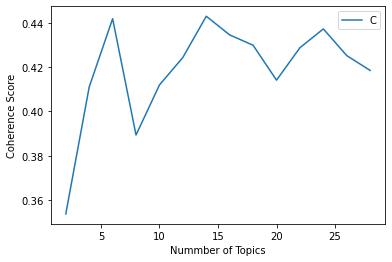

In [17]:
# Plotting the coherence scores on the graph
# Based on the plot, 14 or 24 topics can be a good number

import matplotlib.pyplot as plt

limit = 30; start = 2; step = 2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Nummber of Topics")
plt.ylabel("Coherence Score")
plt.legend(("Coherence_values"), loc='best')
plt.show()

In [18]:
# Determine the optimal number of topics to get lowest perplexity score, using 30 topics
# This may take some time to run

import datetime

print(datetime.datetime.now())

model_list = []
perplexity_values = []
model_topics = []

for num_topics in range(2, 30, 2):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus_vect, num_topics = num_topics, id2word = dictionary, passes = 25, random_state= 0)
    model_topics.append(num_topics)
    model_list.append(ldamodel)
    log_perplexity = ldamodel.log_perplexity(corpus_vect)
    perplexity = 2 ** (-log_perplexity)
    perplexity_values.append(perplexity)
    print("#Topics: " + str(num_topics) + ", Score: " + str(perplexity))

print(datetime.datetime.now())

2022-04-07 15:01:56.882855
#Topics: 2, Score: 167.28045723591737
#Topics: 4, Score: 170.4329624892038
#Topics: 6, Score: 177.33495708832788
#Topics: 8, Score: 185.26718851760933
#Topics: 10, Score: 199.13927789908266
#Topics: 12, Score: 266.9667809604831
#Topics: 14, Score: 379.2020980798881
#Topics: 16, Score: 454.6726730181356
#Topics: 18, Score: 522.1897953184587
#Topics: 20, Score: 587.772283275265
#Topics: 22, Score: 668.157673988989
#Topics: 24, Score: 764.871324038164
#Topics: 26, Score: 878.1664230914869
#Topics: 28, Score: 1002.5243546790451
2022-04-07 15:14:49.735216


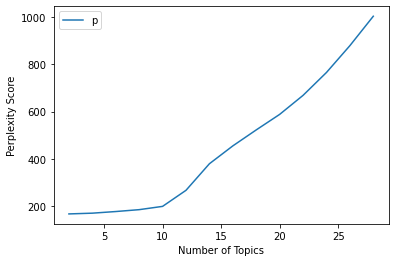

In [19]:
# Plotting perplexity values on the graph
# Based on the plot, 10 or 12 topics can be a good number

import matplotlib.pyplot as plt

limit = 30; start = 2; step = 2;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score")
plt.legend(("perplexity_values"), loc = 'best')
plt.show()

In [20]:
# Based on the coherence and perplexity scores, 12 topics is a good number of topics for our dataset
# Rerun the LDA using 12 topics

num_topics = 12
ldamodel = gensim.models.ldamodel.LdaModel(corpus_vect, num_topics = num_topics, id2word = dictionary, passes = 25, random_state= 0)

In [21]:
# Saving the topic word distribution in a list

topics = ldamodel.show_topics(formatted = True, num_topics = 30, num_words = 10)
for topic in topics:
    print("Topic {}: {}".format(topic[0], topic[1]))
    print("\n")

Topic 0: 0.028*"via" + 0.024*"thumb" + 0.018*"vent" + 0.018*"lee" + 0.013*"problem" + 0.013*"put" + 0.013*"well" + 0.011*"jackson" + 0.011*"job" + 0.011*"get"


Topic 1: 0.037*"peopl" + 0.026*"see" + 0.022*"know" + 0.015*"say" + 0.013*"good" + 0.012*"parti" + 0.012*"like" + 0.012*"air" + 0.012*"comment" + 0.011*"talk"


Topic 2: 0.047*"vaccin" + 0.028*"one" + 0.023*"covid" + 0.022*"two" + 0.018*"thousand" + 0.015*"infect" + 0.014*"hundr" + 0.013*"twenti" + 0.011*"three" + 0.011*"year"


Topic 3: 0.058*"hand" + 0.030*"clap" + 0.021*"like" + 0.011*"pfizer" + 0.010*"work" + 0.010*"law" + 0.010*"forc" + 0.010*"everyon" + 0.010*"thumb" + 0.010*"matter"


Topic 4: 0.038*"state" + 0.033*"unit" + 0.016*"singapor" + 0.014*"life" + 0.012*"singaporean" + 0.012*"stay" + 0.012*"time" + 0.011*"risk" + 0.011*"cd" + 0.010*"get"


Topic 5: 0.041*"variant" + 0.028*"viru" + 0.027*"omicron" + 0.024*"delta" + 0.023*"new" + 0.020*"news" + 0.015*"govt" + 0.015*"time" + 0.012*"fake" + 0.011*"spread"


Topic 6

## Output of 12 topics, human interpretation of topics

Topic 0: via, thumb, vent, lee, problem, put, well, jackson, job, get **(cannot be determined)**  
Topic 1: peopl, see, know, say, good, parti, like, air, comment, talk **(political party members who only knows how to talk)**  
Topic 2: vaccin, one, covid, two, thousand, infect, hundr, twenti, three, year **(covid transmissibility)**   
Topic 3: hand, clap, like, pfizer, work, law, forc, everyon, thumb, matter **(cannot be determined)**  
Topic 4: state, unit, singapor, life, singaporean, stay, time, risk, cd, get **(risk of contracting covid in Singapore)**  
Topic 5: variant, viru, omicron, delta, new, news, govt, time, fake, spread **(spreading of covid variant fake news)**  
Topic 6: thank, trial, trade, skin, tone, made, malaysia, medium, sure, expert **(cannot be determined)**  
Topic 7: travel, vaccin, singapor, countri, lane, open, india, pleas, wait, hope **(hopes that Singapore open travel lanes to India)**  
Topic 8: face, roll, laugh, floor, tear, joy, eye, smile, heart, grin **(facial expressions)**  
Topic 9: pass, allow, english, carri, way, public, must, eas, suffer, speak **(cannot be determined)**  
Topic 10: test, day, per, invest, malaysia, quarantin, without, point, week, cri **(hopes to visit Malaysia without quarantine)**  
Topic 11: singapor, case, open, go, countri, covid, come, live, want, still **(opening of Singapore's travel borders despite covid)**  

## Some observations from the results

Based on the top 10 most frequent words in the 12 topics, we can see that the topics are generally about the transmissibility of COVID-19 and the opening of travel lanes to other countries.  

Additionally, there is a topic which mentions about the different variants of the virus (topic 5) and the opening of Singapore borders to some countries (topics 7 and 10).

There are some topics which are overly generalised and the set of words can be difficult to determine the topics (topics 0, 3, 6, and 9). Therefore, we will be looking for other topic modeling techniques which gives a clearer idea of the topics in one glance.